In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [8]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [9]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

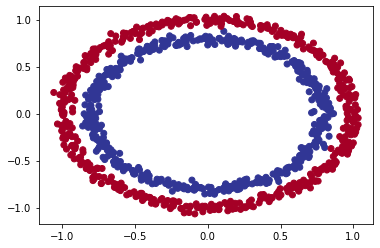

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [13]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(Dense(1))

model_1.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer = 'SGD')

In [14]:
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 746us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 621us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 612us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 666us/step - loss: 0.6942 - accuracy: 0.4820


In [15]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 892us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [16]:
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(Dense(1))
model_2.add(Dense(1))

In [17]:
model_2.compile(loss=BinaryCrossentropy(), optimizer = 'SGD', metrics='accuracy')

In [18]:
model_2.fit(X,y, epochs=100, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

### Improving the Model

In [19]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(Dense(100))
model_3.add(Dense(10))
model_3.add(Dense(1))

model_3.compile(loss=BinaryCrossentropy(), metrics = 'accuracy', optimizer='adam')

In [20]:
model_3.fit(X, y, epochs=100, verbose=0)

In [21]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980253458023071, 0.5080000162124634]

### Plotting Decision Boundaries

In [22]:
def plot_DB(model, X, y):
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    pred = model.predict(x_in)
    
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else: 
        print("doing binary classification...")
        pred = np.round(np.max(pred, axis=1)).reshape(xx.shape)
   
    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification...


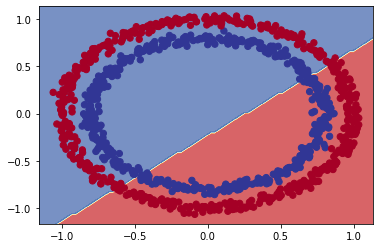

In [23]:
plot_DB(model_3, X, y)

### Regression Model

In [24]:
'''tf.random.set_seed(42)

X_regression = np.arange(0,1000, 5)
y_regression = np.arange(100, 1100, 5)

X_train = X_regression[:150]
X_test  = X_regression[150:]
y_train  = y_regression[:150]
y_test = y_regression[150:]


model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)
'''

'tf.random.set_seed(42)\n\nX_regression = np.arange(0,1000, 5)\ny_regression = np.arange(100, 1100, 5)\n\nX_train = X_regression[:150]\nX_test  = X_regression[150:]\ny_train  = y_regression[:150]\ny_test = y_regression[150:]\n\n\nmodel_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)\n'

In [25]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(Dense(100))
model_3.add(Dense(10))
model_3.add(Dense(1))

model_3.compile(loss='mae', metrics = 'mae', optimizer='adam')

In [26]:
tf.random.set_seed(42)

X_regression = np.arange(0,1000, 5)
y_regression = np.arange(100, 1100, 5)

X_train = X_regression[:150]
X_test  = X_regression[150:]
y_train  = y_regression[:150]
y_test = y_regression[150:]


model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

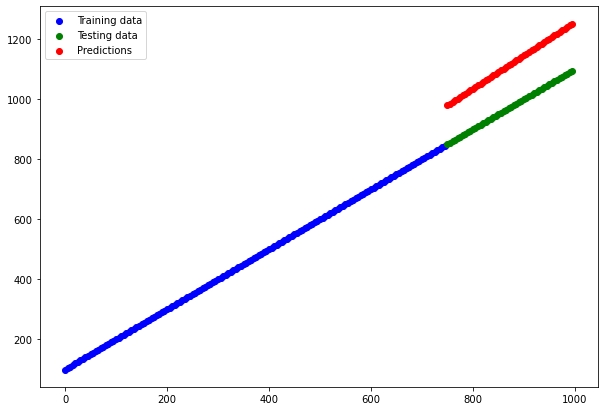

In [27]:
y_preds = model_3.predict(y_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.scatter(X_test, y_preds.squeeze(), c='r', label='Predictions')
plt.legend();

### Non Linear Models

In [28]:
tf.random.set_seed(42)

model_4 = Sequential()

model_4.add(Dense(1, activation='linear'))
model_4.add(Dense(1))


model_4.compile(loss = BinaryCrossentropy(), optimizer = 'adam', metrics='accuracy')

In [29]:
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 999us/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 943us/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.5701 - accuracy: 0.5000
Epoch

32/32 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.4860
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.4900
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.4870
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7042 - accuracy: 0.4890
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4880
Epoch 92/100


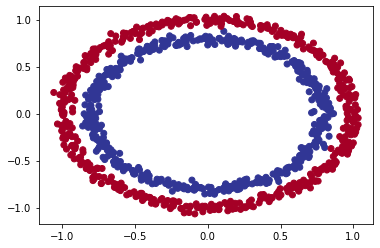

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification...


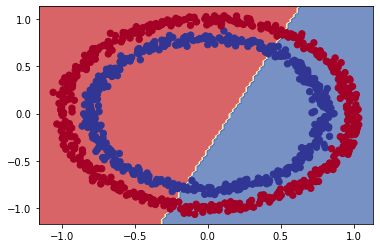

In [31]:
plot_DB(model_4, X, y)

In [32]:
tf.random.set_seed(42)

model_5 = Sequential()

model_5.add(Dense(1, activation='relu'))
model_5.add(Dense(1))

model_5.compile(loss = BinaryCrossentropy(), optimizer='adam', metrics = 'accuracy')

In [33]:
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5070
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4680
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4590
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4980
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4910
Epoch 92/100


In [34]:
tf.random.set_seed(42)

model_6 = Sequential()

model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(4, activation='relu'))

model_6.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

C:\Users\SURIYA\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [35]:
model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 3.2091 - accuracy: 0.0010 
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.1490
Epoch 11

32/32 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.3460
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.3540
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.3490
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.3480
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.3480
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.3520
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.3530
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.3470
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.3590
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.3500
Epoch 92/100


In [36]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 883us/step - loss: 0.6643 - accuracy: 0.3780


[0.6643016338348389, 0.3779999911785126]

doing multiclass classification...


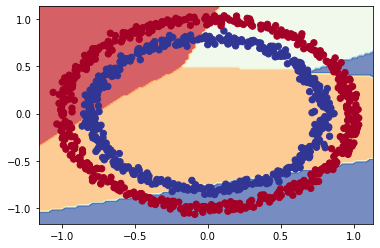

In [37]:
plot_DB(model_6, X, y)

### Activation Functions

In [38]:
A = tf.cast(tf.range(-10,10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

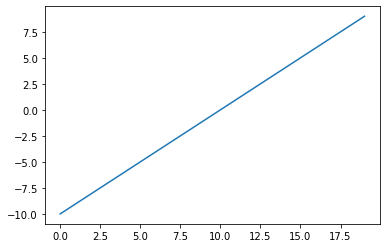

In [39]:
plt.plot(A)

In [40]:
def sigmoid(x):
    return 1/(1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

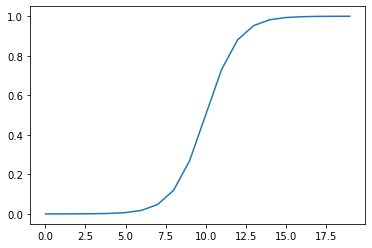

In [41]:
plt.plot(sigmoid(A))

In [42]:
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

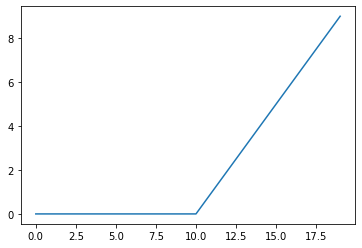

In [43]:
plt.plot(relu(A))

### Evaluating and improving the model

In [44]:
len(X)

1000

In [45]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [46]:
tf.random.set_seed(42)

model_8 = Sequential()

model_8.add(Dense(4, activation='relu'))
model_8.add(Dense(4, activation = 'relu'))
model_8.add(Dense(1, activation='sigmoid'))


model_8.compile(loss=BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics='accuracy')

C:\Users\SURIYA\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 949us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 825us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 935us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 926us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25

In [48]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849122524261, 1.0]

doing binary classification...
doing binary classification...


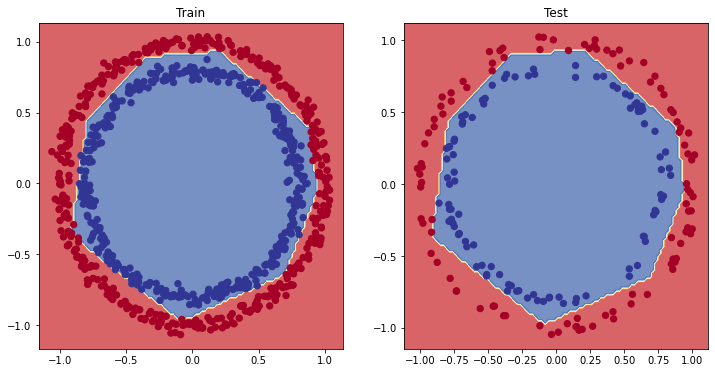

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_DB(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_DB(model_8, X=X_test, y=y_test)
plt.show()

### Plotting the Losses

In [50]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


<AxesSubplot:>

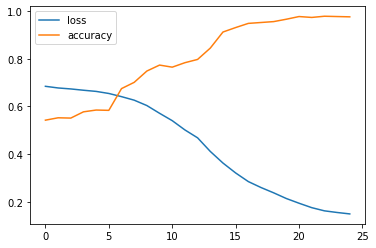

In [51]:
pd.DataFrame(history.history).plot()

### Finding the Best Learning Rate

In [52]:
tf.random.set_seed(42)

model_9 = Sequential()

model_9.add(Dense(4, activation='relu'))
model_9.add(Dense(4, activation='relu'))
model_9.add(Dense(1, activation='sigmoid'))


model_9.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer = 'Adam')


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4*10 **(epoch/20))

history = model_9.fit(X_train, y_train, epochs=100, callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

25/25 [==============================] - 0s 1ms/step - loss: 0.2138 - accuracy: 0.9300 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9463 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9250 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8775 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8800 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9388 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8425 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8625 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9075 - lr: 0.8

<AxesSubplot:>

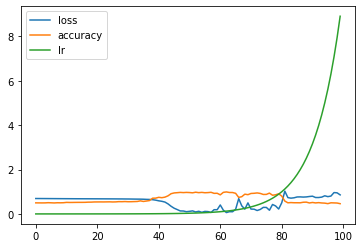

In [53]:
pd.DataFrame(history.history).plot()

### Plotting the Learning Rate Vs Loss

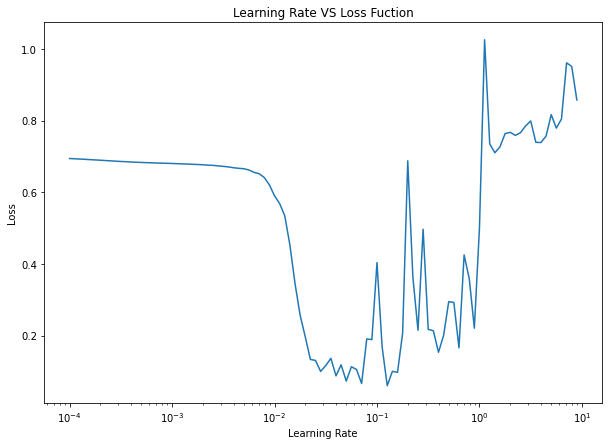

In [54]:
lrs = 1e-4*(10**(np.arange(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss Fuction")
plt.show()

In [55]:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
tf.random.set_seed(42)


model_10 = Sequential()

model_10.add(Dense(4, activation='relu'))
model_10.add(Dense(4, activation='relu'))
model_10.add(Dense(1, activation='sigmoid'))


model_10.compile(loss=BinaryCrossentropy(), metrics='accuracy', optimizer = tf.keras.optimizers.Adam(lr = 0.02))

history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


C:\Users\SURIYA\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [57]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401858270168304, 0.9900000095367432]

doing binary classification...
doing binary classification...


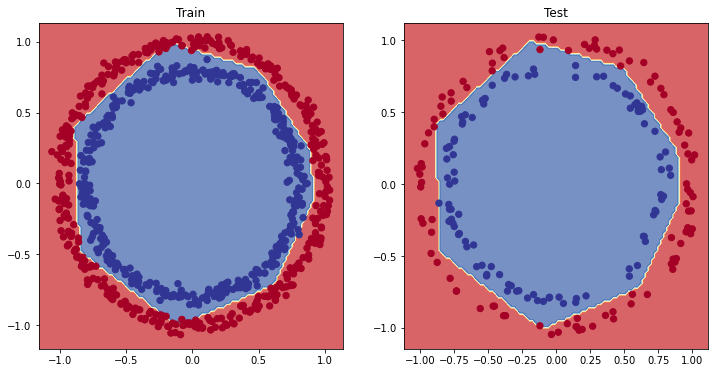

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_DB(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_DB(model_10, X=X_test, y=y_test)
plt.show()

### Evaluation Metrics

In [59]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.057401858270168304
Model accuracy on test set: 99.00%


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
y_pred = model_10.predict(X_test)

In [62]:
#confusion_matrix(y_test, y_pred)

In [63]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [64]:
y_pred[:10]

array([[9.8526537e-01],
       [9.9923801e-01],
       [9.9032342e-01],
       [9.9706948e-01],
       [3.9622903e-01],
       [1.8126875e-02],
       [9.6829069e-01],
       [1.9746810e-02],
       [9.9967158e-01],
       [5.6457520e-04]], dtype=float32)

In [65]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]], dtype=int64)

In [67]:
from sklearn.metrics import plot_confusion_matrix